In [1]:
import pickle
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pickle.load(open('cleaned_training.p', 'rb'))

In [3]:
from data_functions import create_training_data

In [4]:
X, Y_root, Y_vowel, Y_consonant = create_training_data(data)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = train_test_split(X, Y_root, Y_vowel, Y_consonant, test_size=0.05, random_state=42)

In [6]:
from keras.models import Model, load_model, Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input

Using TensorFlow backend.


In [5]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = MaxPool2D(pool_size=(3, 3))(model)
model = Conv2D(filters=16, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.1)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dense(512, activation = 'relu')(model)
dense = Dense(256, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [8]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 64,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/64
171718/171718 [==============================] - 38s 221us/step - loss: 4.9110 - dense_4_loss: 3.5061 - dense_5_loss: 0.7508 - dense_6_loss: 0.6536 - dense_4_accuracy: 0.1766 - dense_5_accuracy: 0.7355 - dense_6_accuracy: 0.7707 - val_loss: 3.4024 - val_dense_4_loss: 2.4680 - val_dense_5_loss: 0.4844 - val_dense_6_loss: 0.4511 - val_dense_4_accuracy: 0.3347 - val_dense_5_accuracy: 0.8255 - val_dense_6_accuracy: 0.8374
Epoch 2/64
171718/171718 [==============================] - 32s 188us/step - loss: 2.9242 - dense_4_loss: 2.1198 - dense_5_loss: 0.4094 - dense_6_loss: 0.3949 - dense_4_accuracy: 0.4168 - dense_5_accuracy: 0.8558 - dense_6_accuracy: 0.8588 - val_loss: 2.5663 - val_dense_4_loss: 1.8370 - val_dense_5_loss: 0.3816 - val_dense_6_loss: 0.3478 - val_dense_4_accuracy: 0.4811 - val_dense_5_accuracy: 0.8667 - val_dense_6_accuracy: 0.8767
Epoch 3/64
171718/171718 [==============================] - 32s 188us/step - loss: 

In [9]:
# model.save('model_5.h5')
print('Model saved to disk')
# pickle.dump(hist, open('model_5_history.p', 'wb'))

Model saved to disk


In [7]:
from keras.models import load_model

In [6]:
model = load_model('model_5.h5')

In [7]:
hist = pickle.load(open('model_5_history.p', 'rb'))

In [8]:
def plot_loss(model, hist):
    epochs = len(hist.history['loss'])
    loss_names = []
    for name in model.output_names:
        loss_names.append(name + '_loss')
        loss_names.append('val_' +name + '_loss')
    plt.style.use('ggplot')
    plt.figure(figsize= (12,15))
    plt.plot(np.arange(0, epochs), hist.history['loss'], label='train_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[0]], label='train_root_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[2]], label='train_vowel_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[4]], label='train_consonant_loss')
    
    plt.plot(np.arange(0, epochs), hist.history['val_loss'], label='val_train_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[1]], label='val_train_root_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[3]], label='val_train_vowel_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[5]], label='val_train_consonant_loss')
    
    plt.title('Loss against number of epochs')
    plt.xlabel('Epoch #')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
def plot_accuracy(model, hist):
    epochs = len(hist.history['loss'])
    acc_names = []
    for name in model.output_names:
        acc_names.append(name + '_accuracy')
        acc_names.append('val_' +name + '_accuracy')
    plt.style.use('ggplot')
    plt.figure(figsize= (12,15))
    plt.plot(np.arange(0, epochs), hist.history[acc_names[0]], label='train_root_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[2]], label='train_vowel_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[4]], label='train_consonant_accuracy')
    
    plt.plot(np.arange(0, epochs), hist.history[acc_names[1]], label='val_train_root_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[3]], label='val_train_vowel_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[5]], label='val_train_consonant_accuracy')
    
    plt.title('Accuracy against number of epochs')
    plt.xlabel('Epoch #')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()

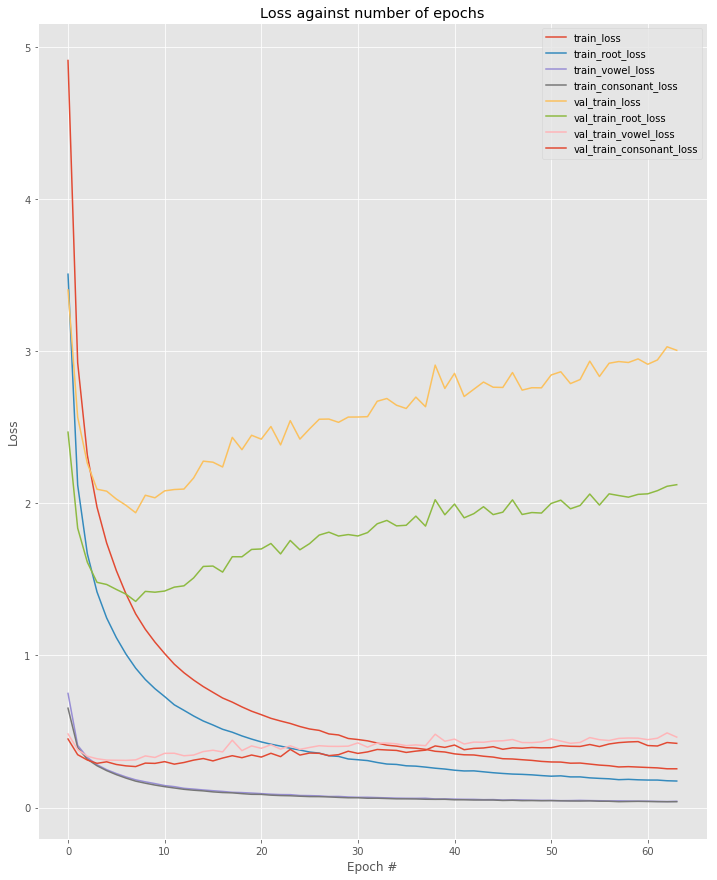

In [10]:
plot_loss(model,hist)

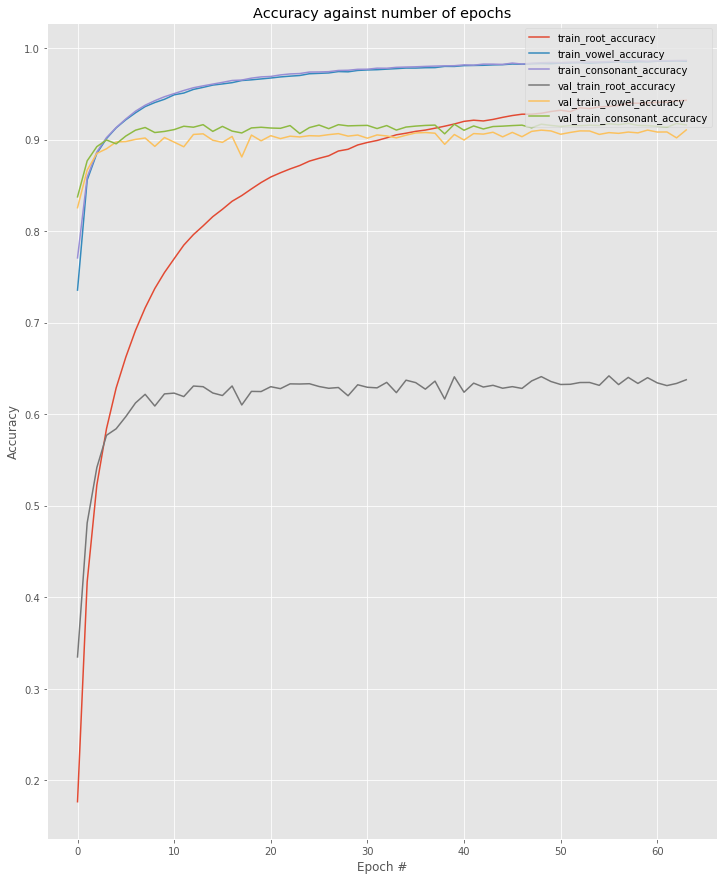

In [11]:
plot_accuracy(model, hist)

In [17]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
hist= model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 16,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/16
171718/171718 [==============================] - 165s 959us/step - loss: 6.2537 - dense_15_loss: 4.2521 - dense_16_loss: 1.0692 - dense_17_loss: 0.9319 - dense_15_accuracy: 0.0739 - dense_16_accuracy: 0.6533 - dense_17_accuracy: 0.7117 - val_loss: 4.5236 - val_dense_15_loss: 3.3855 - val_dense_16_loss: 0.6172 - val_dense_17_loss: 0.5215 - val_dense_15_accuracy: 0.1619 - val_dense_16_accuracy: 0.7889 - val_dense_17_accuracy: 0.8151
Epoch 2/16
171718/171718 [==============================] - 164s 956us/step - loss: 4.2192 - dense_15_loss: 3.0934 - dense_16_loss: 0.6136 - dense_17_loss: 0.5120 - dense_15_accuracy: 0.2113 - dense_16_accuracy: 0.7865 - dense_17_accuracy: 0.8217 - val_loss: 3.1480 - val_dense_15_loss: 2.3428 - val_dense_16_loss: 0.4437 - val_dense_17_loss: 0.3632 - val_dense_15_accuracy: 0.3621 - val_dense_16_accuracy: 0.8475 - val_dense_17_accuracy: 0.8725
Epoch 3/16
171718/171718 [==============================]

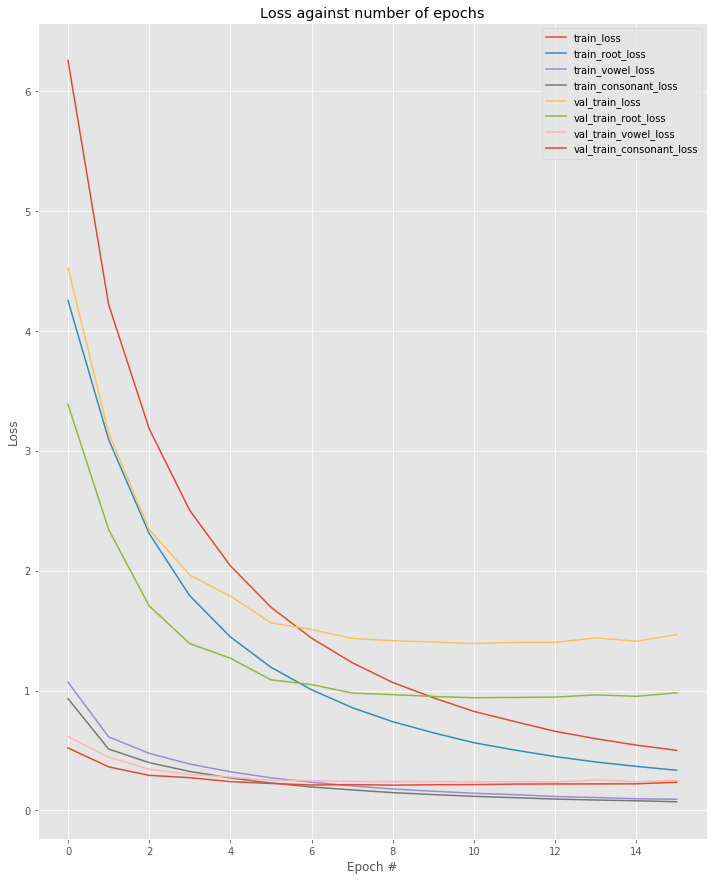

In [19]:
plot_loss(model, hist)

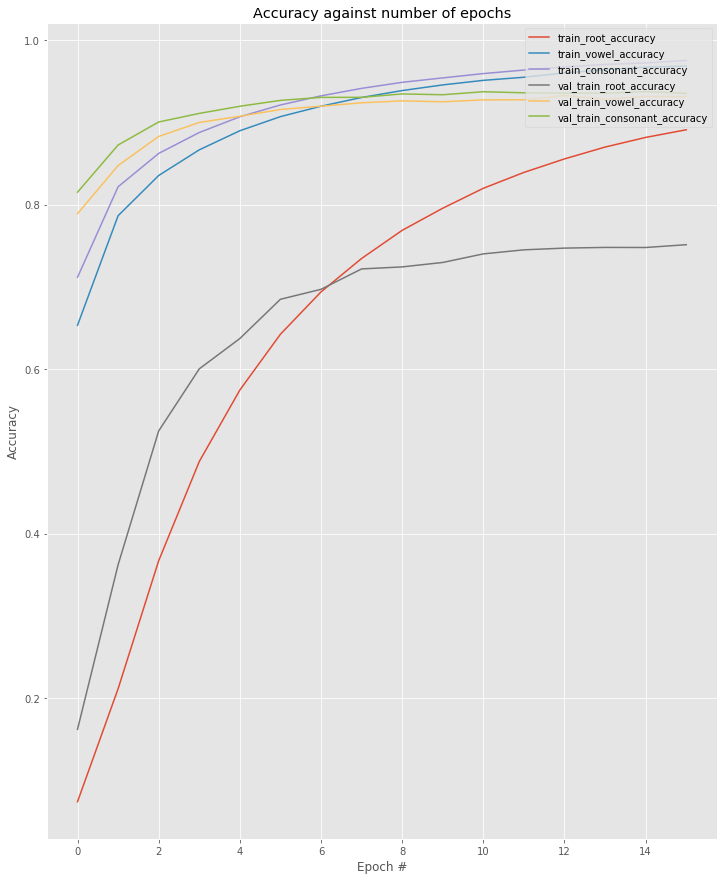

In [20]:
plot_accuracy(model, hist)

In [21]:
# model.save('model_6.h5')
print('Model saved to disk')
# pickle.dump(hist, open('model_6_history.p', 'wb'))

Model saved to disk


In [22]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)


model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [23]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 32,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/32
171718/171718 [==============================] - 253s 1ms/step - loss: 6.1613 - dense_20_loss: 4.0907 - dense_21_loss: 1.1314 - dense_22_loss: 0.9384 - dense_20_accuracy: 0.1349 - dense_21_accuracy: 0.7089 - dense_22_accuracy: 0.7469 - val_loss: 3.7025 - val_dense_20_loss: 2.6871 - val_dense_21_loss: 0.5465 - val_dense_22_loss: 0.4701 - val_dense_20_accuracy: 0.2976 - val_dense_21_accuracy: 0.8169 - val_dense_22_accuracy: 0.8375
Epoch 2/32
171718/171718 [==============================] - 251s 1ms/step - loss: 2.8401 - dense_20_loss: 2.0458 - dense_21_loss: 0.4122 - dense_22_loss: 0.3820 - dense_20_accuracy: 0.4381 - dense_21_accuracy: 0.8592 - dense_22_accuracy: 0.8693 - val_loss: 2.3621 - val_dense_20_loss: 1.6695 - val_dense_21_loss: 0.3721 - val_dense_22_loss: 0.3231 - val_dense_20_accuracy: 0.5291 - val_dense_21_accuracy: 0.8713 - val_dense_22_accuracy: 0.8905
Epoch 3/32
171718/171718 [==============================] - 2

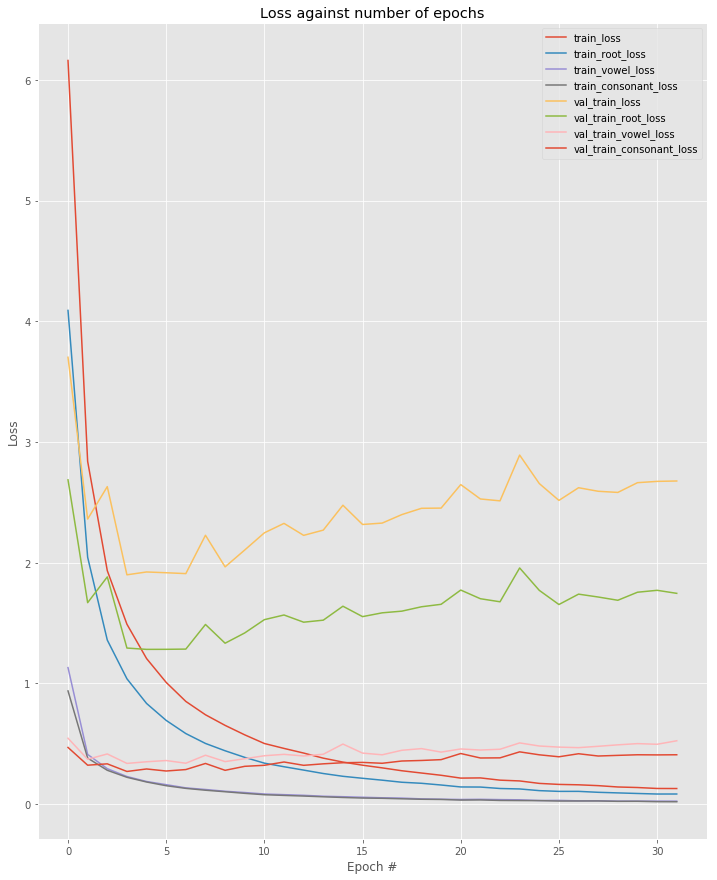

In [24]:
plot_loss(model, hist)

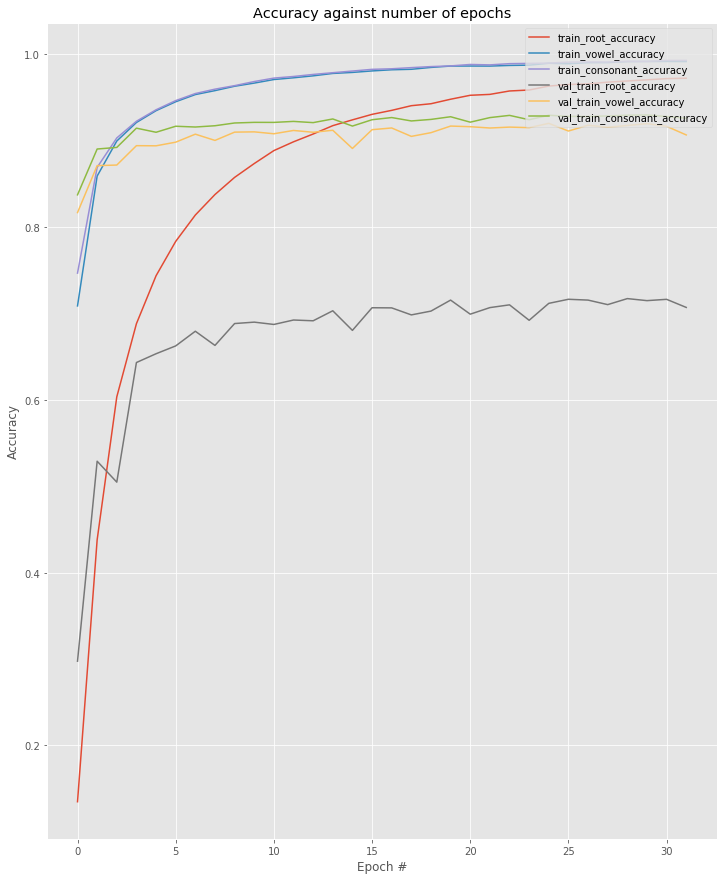

In [25]:
plot_accuracy(model, hist)